In [1]:
import torch
torch_version = torch.__version__
print(torch_version)

2.2.1+cu121


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd drive/MyDrive/cycleGAN/ &&  python3 train.py

Saving logs in checkpoints/my_CycleGAN
Number of X images: 1854, Number of Y images: 888
Starting training loop from epoch 41...
Losses printed as [epoch / total epochs] [batch / total batches]
Total epochs:  100
LR: [0.0002]
[41/100] [1854/1854] Losses: total_loss: 6.0437059
LR: [0.0002]
[42/100] [1854/1854] Losses: total_loss: 4.8363113
LR: [0.0002]
[43/100] [1854/1854] Losses: total_loss: 4.4915576
LR: [0.0002]
[44/100] [1854/1854] Losses: total_loss: 6.7071881
LR: [0.0002]
[45/100] [1854/1854] Losses: total_loss: 5.9581594
LR: [0.0002]
[46/100] [1854/1854] Losses: total_loss: 8.4720106
LR: [0.0002]
[47/100] [1854/1854] Losses: total_loss: 5.9334135
LR: [0.0002]
[48/100] [1854/1854] Losses: total_loss: 6.0907984
LR: [0.0002]
[49/100] [1854/1854] Losses: total_loss: 6.4123540
LR: [0.0002]
[50/100] [1854/1854] Losses: total_loss: 12.7342215
Saving models at end of epoch 50
LR: [0.0002]
[51/100] [1854/1854] Losses: total_loss: 4.2882648
LR: [0.0002]
[52/100] [1854/1854] Losses: total_l

In [ ]:
!cd drive/MyDrive/cycleGAN/ &&  python3 test.py

Saving logs in checkpoints/my_CycleGAN
Saving images in results/my_CycleGAN_test


In [4]:
import pickle
import torch

with open('drive/MyDrive/cycleGAN/checkpoints/loss.pkl', 'rb') as file:
    history = pickle.load(file)

In [6]:
len(history)

60

In [14]:
history[0]['D_X'].tolist()

0.22651875019073486

In [16]:
history[0]

OrderedDict([('D_X', tensor(0.2265, device='cuda:0', requires_grad=True)),
             ('D_Y', tensor(0.1797, device='cuda:0', requires_grad=True)),
             ('G', tensor(0.3585, device='cuda:0', requires_grad=True)),
             ('F', tensor(0.3707, device='cuda:0', requires_grad=True)),
             ('cycle_X', tensor(1.8037, device='cuda:0', requires_grad=True)),
             ('cycle_Y', tensor(1.9370, device='cuda:0', requires_grad=True)),
             ('identity_loss',
              tensor(1.5737, device='cuda:0', requires_grad=True)),
             ('total_loss',
              tensor(6.0437, device='cuda:0', requires_grad=True))])

In [18]:
import matplotlib.pyplot as plt
import numpy as np

epoch = len(history)

dx_loss = []
dy_loss = []
cycx_loss = []
cycy_loss = []
idt_loss = []
total_loss = []

for i in range(epoch):
  dx_loss.append(history[i]['D_X'].tolist())
  dy_loss.append(history[i]['D_Y'].tolist())
  cycx_loss.append(history[i]['cycle_X'].tolist())
  cycy_loss.append(history[i]['cycle_Y'].tolist())
  idt_loss.append(history[i]['identity_loss'].tolist())
  total_loss.append(history[i]['total_loss'].tolist())

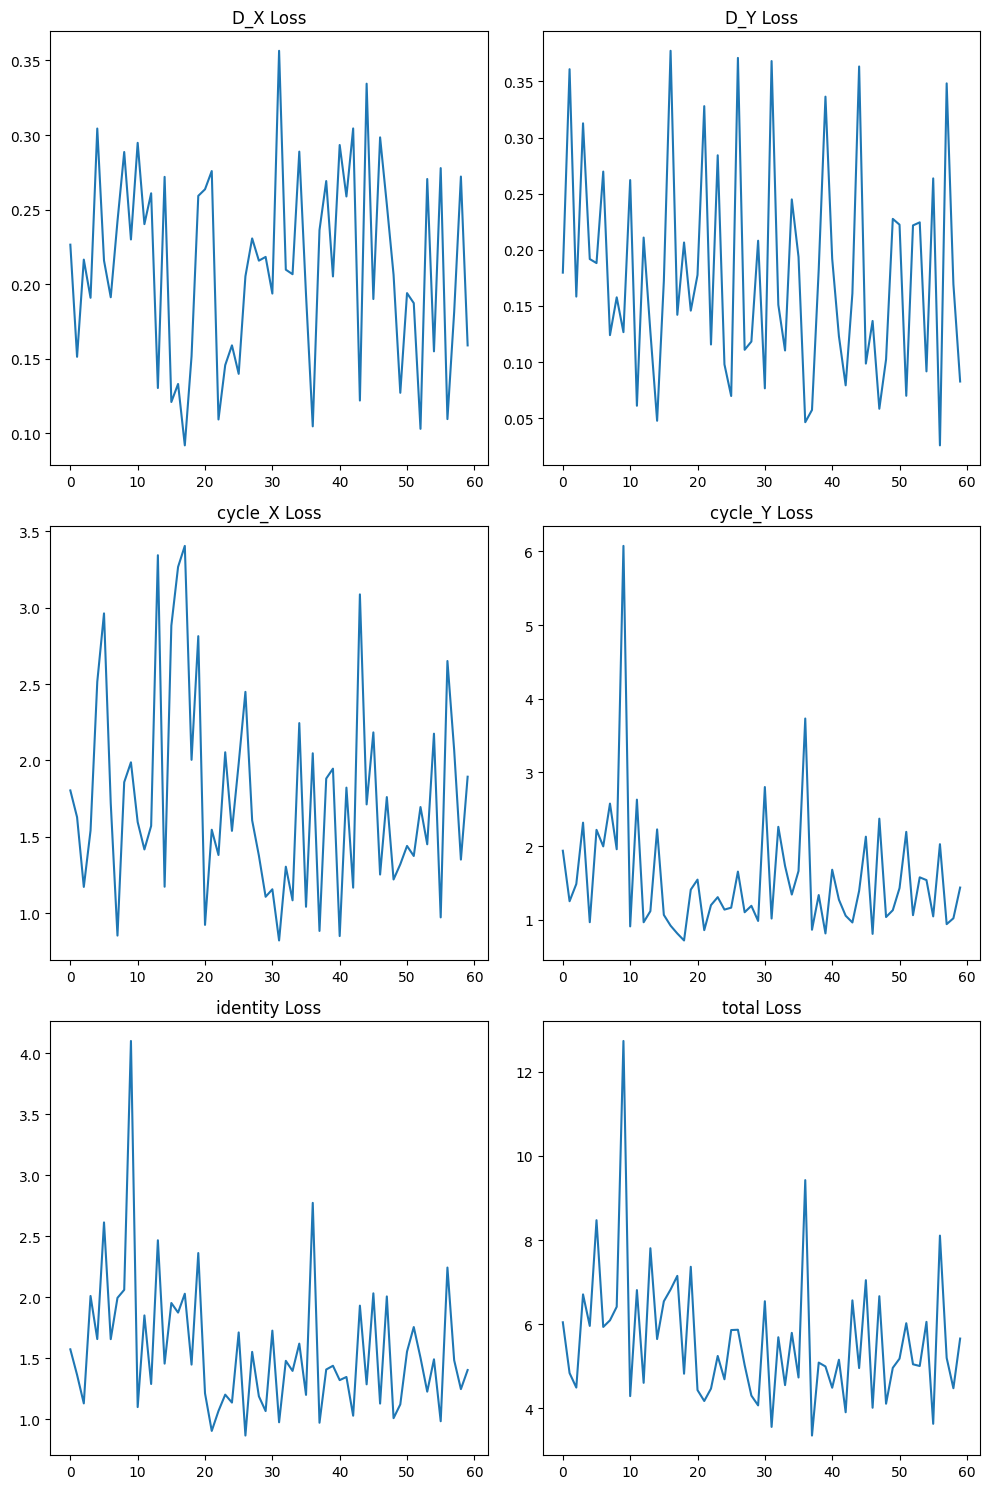

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(10, 15))
epoch_lis = [i for i in range(epoch)]
axs[0, 0].plot(epoch_lis, dx_loss)
axs[0, 0].set_title('D_X Loss')

axs[0, 1].plot(epoch_lis, dy_loss)
axs[0, 1].set_title('D_Y Loss')

axs[1, 0].plot(epoch_lis, cycx_loss)
axs[1, 0].set_title('cycle_X Loss')

axs[1, 1].plot(epoch_lis, cycy_loss)
axs[1, 1].set_title('cycle_Y Loss')

axs[2, 0].plot(epoch_lis, idt_loss)
axs[2, 0].set_title('identity Loss')

axs[2, 1].plot(epoch_lis, total_loss)
axs[2, 1].set_title('total Loss')

# Adding a tight layout to adjust spacing
plt.tight_layout()

# Displaying the plot
plt.show()